<a href="https://colab.research.google.com/github/Kishorevasan2002/HR_DB_Analysis/blob/main/HR_DB_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HR_DB_Analysis

###ER_DIAGRAM



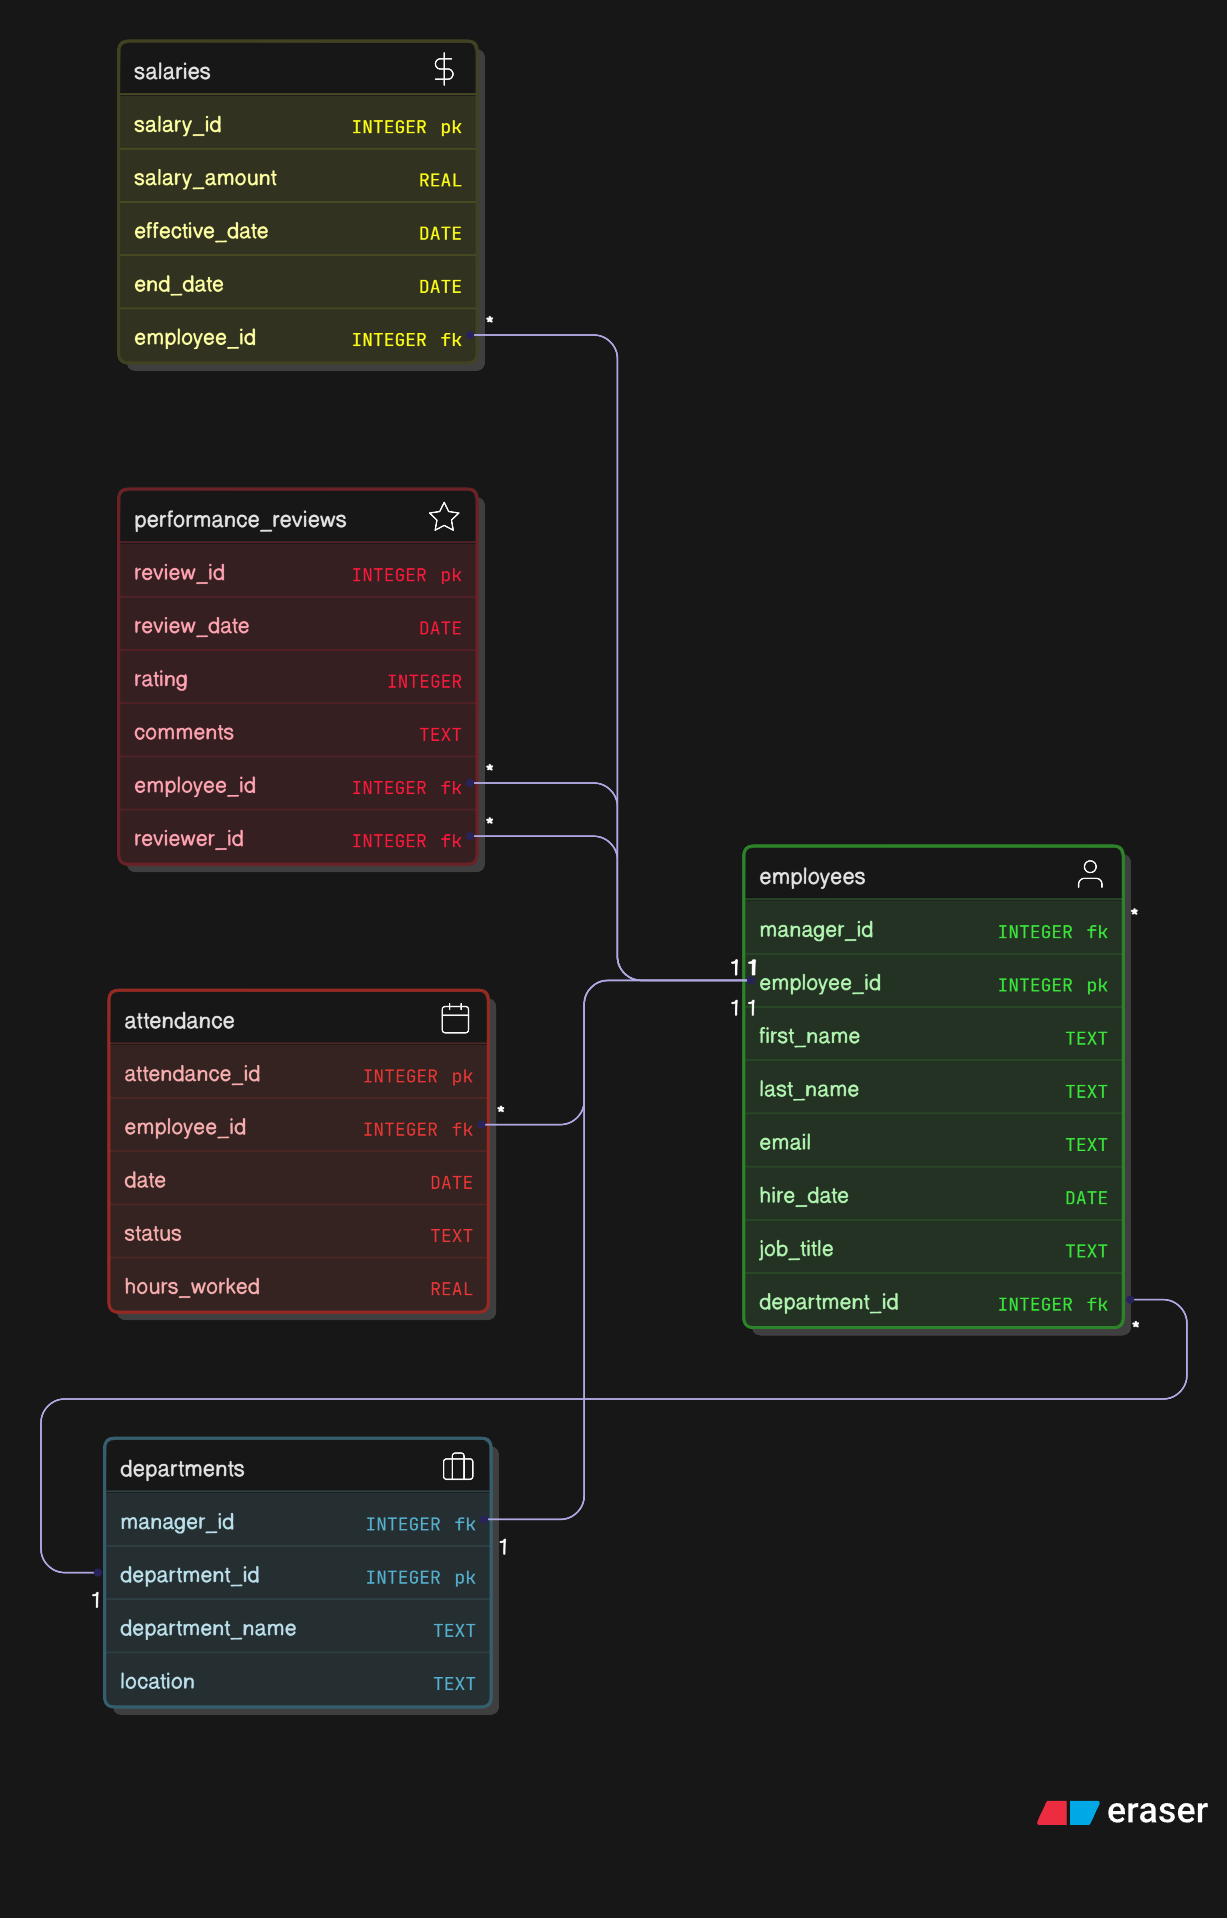

In [12]:
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')
cursor = conn.cursor()

# Query to get the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

# Close the connection
conn.close()

Departments
Employees
Salaries
Performance_Reviews
Attendance


In [13]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')
cursor = conn.cursor()

# Query to get the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the number of entries in each table
for table in tables:
    table_name = table[0]
    cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
    count = cursor.fetchone()[0]
    print(f"Table '{table_name}': {count} entries")

# Close the connection
conn.close()

Table 'Departments': 10 entries
Table 'Employees': 1500 entries
Table 'Salaries': 1500 entries
Table 'Performance_Reviews': 249 entries
Table 'Attendance': 3532 entries


In [14]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')
cursor = conn.cursor()

# Query to get the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Display the columns for each table
for table in tables:
    table_name = table[0]
    print(f"Table: {table_name}")
    query = f"PRAGMA table_info({table_name});"
    df = pd.read_sql_query(query, conn)
    display(df)
    print("\n" + "="*50 + "\n")

# Close the connection
conn.close()

Table: Departments


,cid,name,type,notnull,dflt_value,pk
0,0,department_id,INTEGER,0,None,1
1,1,department_name,TEXT,1,None,0
2,2,location,TEXT,0,None,0
3,3,manager_id,INTEGER,0,None,0




Table: Employees


,cid,name,type,notnull,dflt_value,pk
0,0,employee_id,INTEGER,0,None,1
1,1,first_name,TEXT,1,None,0
2,2,last_name,TEXT,1,None,0
3,3,email,TEXT,0,None,0
4,4,hire_date,DATE,1,None,0
5,5,department_id,INTEGER,0,None,0
6,6,job_title,TEXT,0,None,0
7,7,manager_id,INTEGER,0,None,0




Table: Salaries


,cid,name,type,notnull,dflt_value,pk
0,0,salary_id,INTEGER,0,None,1
1,1,employee_id,INTEGER,0,None,0
2,2,salary_amount,REAL,1,None,0
3,3,effective_date,DATE,1,None,0
4,4,end_date,DATE,0,None,0




Table: Performance_Reviews


,cid,name,type,notnull,dflt_value,pk
0,0,review_id,INTEGER,0,None,1
1,1,employee_id,INTEGER,0,None,0
2,2,review_date,DATE,1,None,0
3,3,rating,INTEGER,0,None,0
4,4,comments,TEXT,0,None,0
5,5,reviewer_id,INTEGER,0,None,0




Table: Attendance


,cid,name,type,notnull,dflt_value,pk
0,0,attendance_id,INTEGER,0,None,1
1,1,employee_id,INTEGER,0,None,0
2,2,date,DATE,1,None,0
3,3,status,TEXT,0,None,0
4,4,hours_worked,REAL,0,None,0


In [15]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')
cursor = conn.cursor()

# Query to get the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Display the head of each table
for table in tables:
    table_name = table[0]
    print(f"Table: {table_name}")
    query = f"SELECT * FROM {table_name} LIMIT 5;"
    df = pd.read_sql_query(query, conn)
    display(df)
    print("\n" + "="*50 + "\n")

# Close the connection
conn.close()

Table: Departments


,department_id,department_name,location,manager_id
0,1,Human Resources,New York,41.0
1,2,Engineering,San Francisco,77.0
2,3,Sales,Chicago,22.0
3,4,Marketing,Boston,NaN
4,5,Finance,New York,NaN




Table: Employees


,employee_id,first_name,last_name,email,hire_date,department_id,job_title,manager_id
0,1,Carl,Thomas,carl.thomas.1@company.com,2016-04-02,4,Content Creator,None
1,2,Kathleen,Long,kathleen.long.2@company.com,2015-12-04,6,Operations Coordinator,None
2,3,Robert,Carpenter,robert.carpenter.3@company.com,2016-09-12,9,Network Administrator,None
3,4,William,Hernandez,william.hernandez.4@company.com,2017-07-09,4,Marketing Analyst,None
4,5,John,Manning,john.manning.5@company.com,2016-06-24,7,Support Specialist,None




Table: Salaries


,salary_id,employee_id,salary_amount,effective_date,end_date
0,1,1,117574.0,2025-05-03,None
1,2,2,56731.0,2024-08-09,None
2,3,3,56350.0,2025-07-11,None
3,4,4,106669.0,2024-11-19,None
4,5,5,63149.0,2025-02-14,None




Table: Performance_Reviews


,review_id,employee_id,review_date,rating,comments,reviewer_id
0,1,23,2025-03-12,2,Trade available data can note defense.,17
1,2,28,2024-09-13,4,Center develop suddenly maybe.,22
2,3,32,2025-02-21,1,Current middle meet with.,22
3,4,34,2024-09-03,1,Cost middle different see Mrs garden race.,17
4,5,37,2025-06-09,5,Threat senior as that stock real such.,17




Table: Attendance


,attendance_id,employee_id,date,status,hours_worked
0,1,3,2025-07-05,Half-day,4.0
1,2,3,2025-06-26,Present,8.0
2,3,3,2025-07-16,Half-day,4.0
3,4,3,2025-07-05,Leave,0.0
4,5,3,2025-07-12,Present,8.0


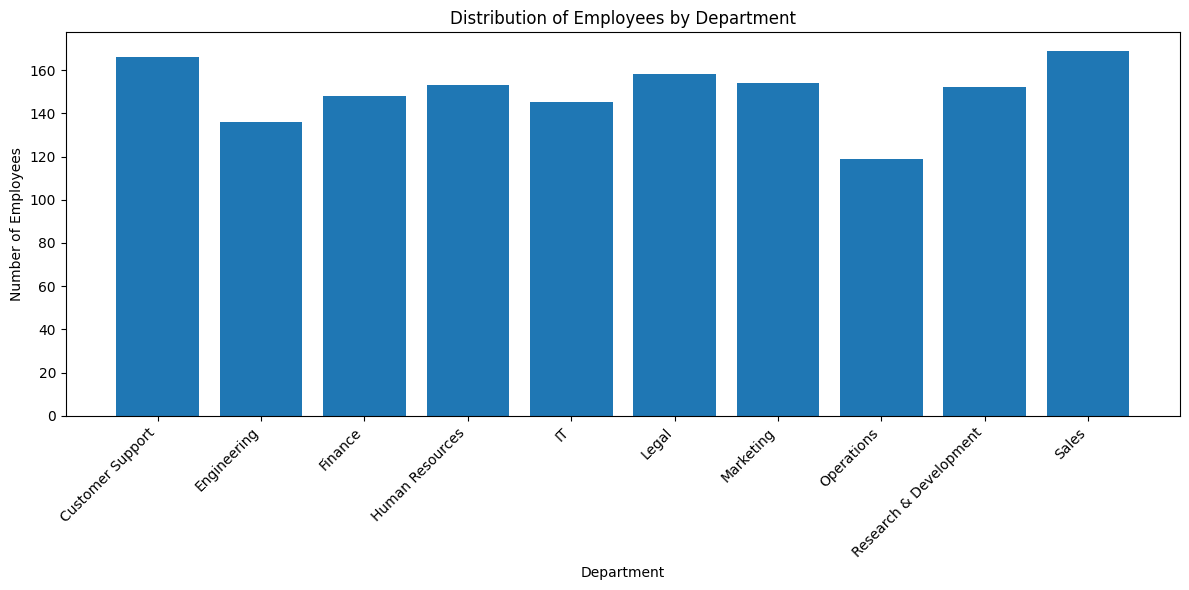

In [16]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')

# SQL query to join Employees and Departments and count employees per department
query = """
SELECT
    d.department_name,
    COUNT(e.employee_id) AS num_employees
FROM
    Employees e
JOIN
    Departments d ON e.department_id = d.department_id
GROUP BY
    d.department_name;
"""

# Execute the query and load the result into a pandas DataFrame
df_department_distribution = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(df_department_distribution['department_name'], df_department_distribution['num_employees'])
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employees by Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

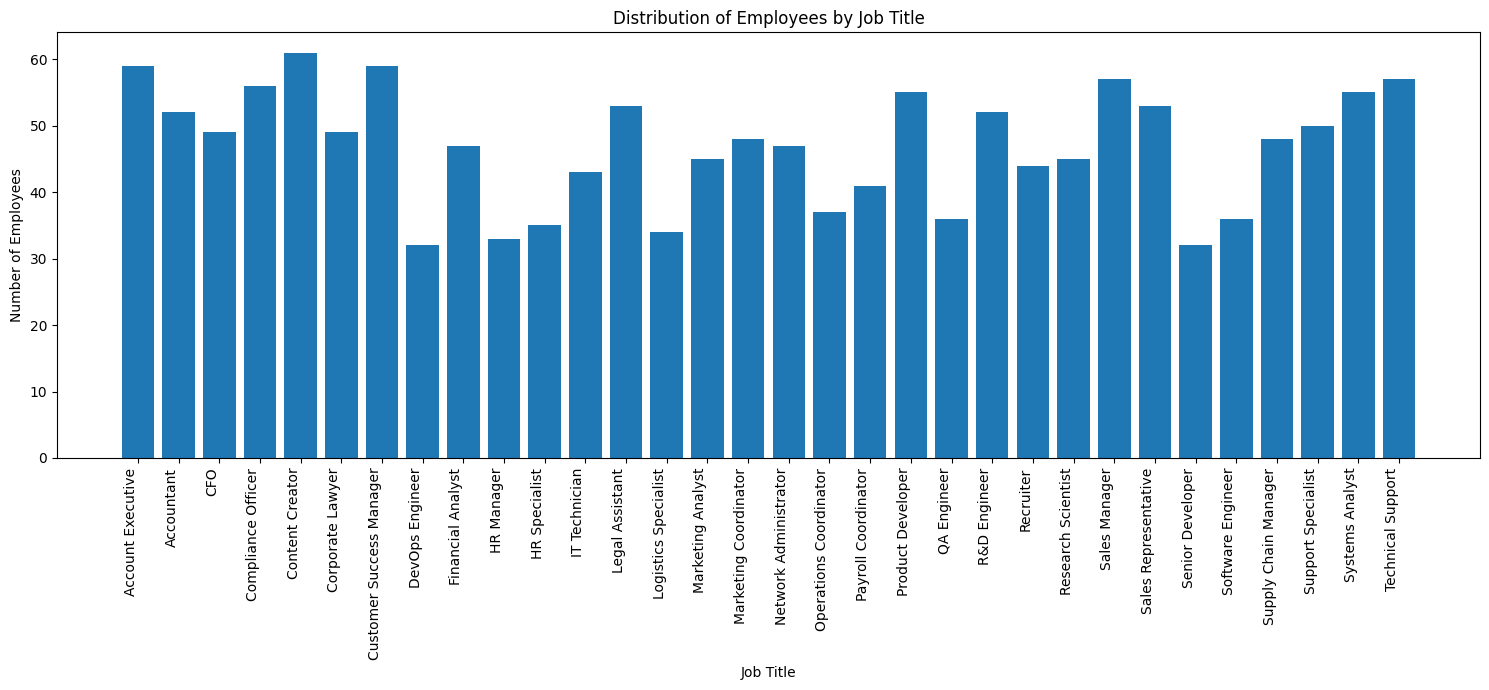

In [17]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')

# SQL query to count the number of employees for each job_title
query = """
SELECT
    job_title,
    COUNT(employee_id) AS num_employees
FROM
    Employees
GROUP BY
    job_title;
"""

# Execute the query and load the result into a pandas DataFrame
df_job_title_distribution = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the bar plot
plt.figure(figsize=(15, 7))
plt.bar(df_job_title_distribution['job_title'], df_job_title_distribution['num_employees'])
plt.xlabel('Job Title')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employees by Job Title')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

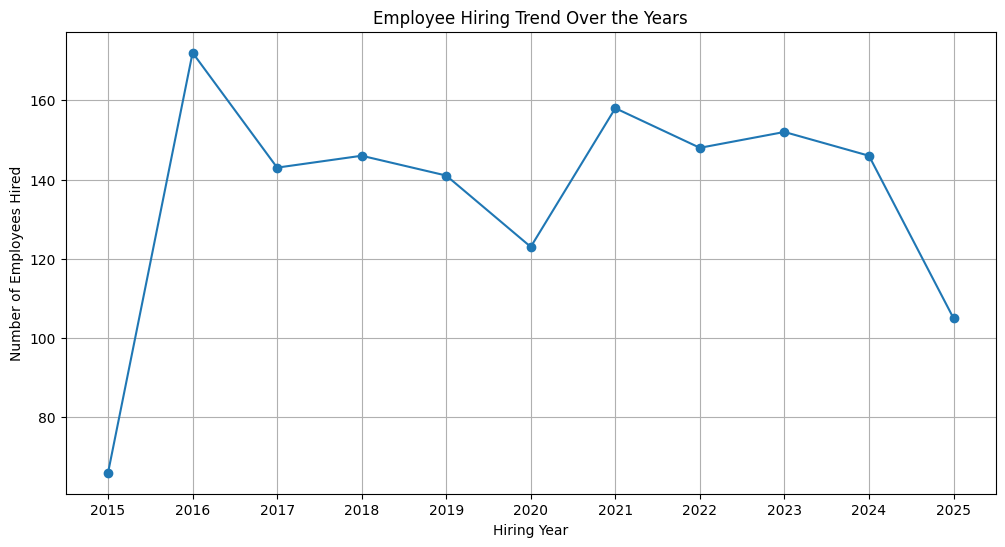

In [18]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')

# SQL query to extract the year from hire_date and count employees per year
query = """
SELECT
    STRFTIME('%Y', hire_date) AS hiring_year,
    COUNT(employee_id) AS num_employees
FROM
    Employees
GROUP BY
    hiring_year
ORDER BY
    hiring_year;
"""

# Execute the query and load the result into a pandas DataFrame
df_hiring_trend = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(df_hiring_trend['hiring_year'], df_hiring_trend['num_employees'], marker='o')
plt.xlabel('Hiring Year')
plt.ylabel('Number of Employees Hired')
plt.title('Employee Hiring Trend Over the Years')
plt.grid(True)
plt.show()

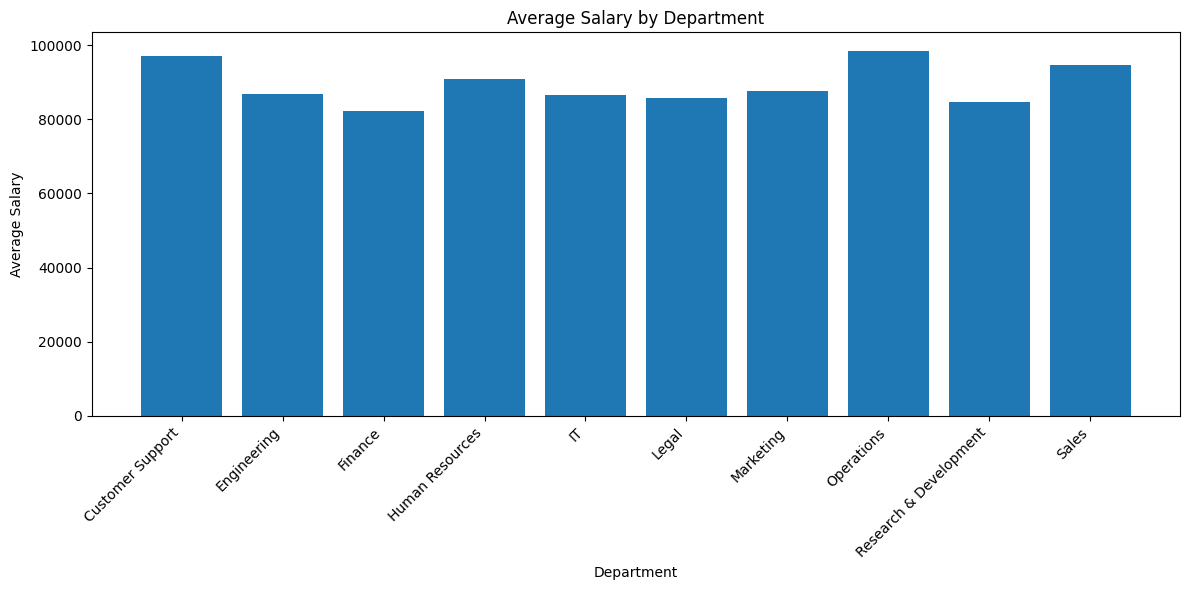

In [19]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')

# SQL query to calculate the average salary for each department
query = """
SELECT
    d.department_name,
    AVG(s.salary_amount) AS average_salary
FROM
    Employees e
JOIN
    Departments d ON e.department_id = d.department_id
JOIN
    Salaries s ON e.employee_id = s.employee_id
GROUP BY
    d.department_name;
"""

# Execute the query and load the result into a pandas DataFrame
df_avg_salary_department = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(df_avg_salary_department['department_name'], df_avg_salary_department['average_salary'])
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.title('Average Salary by Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

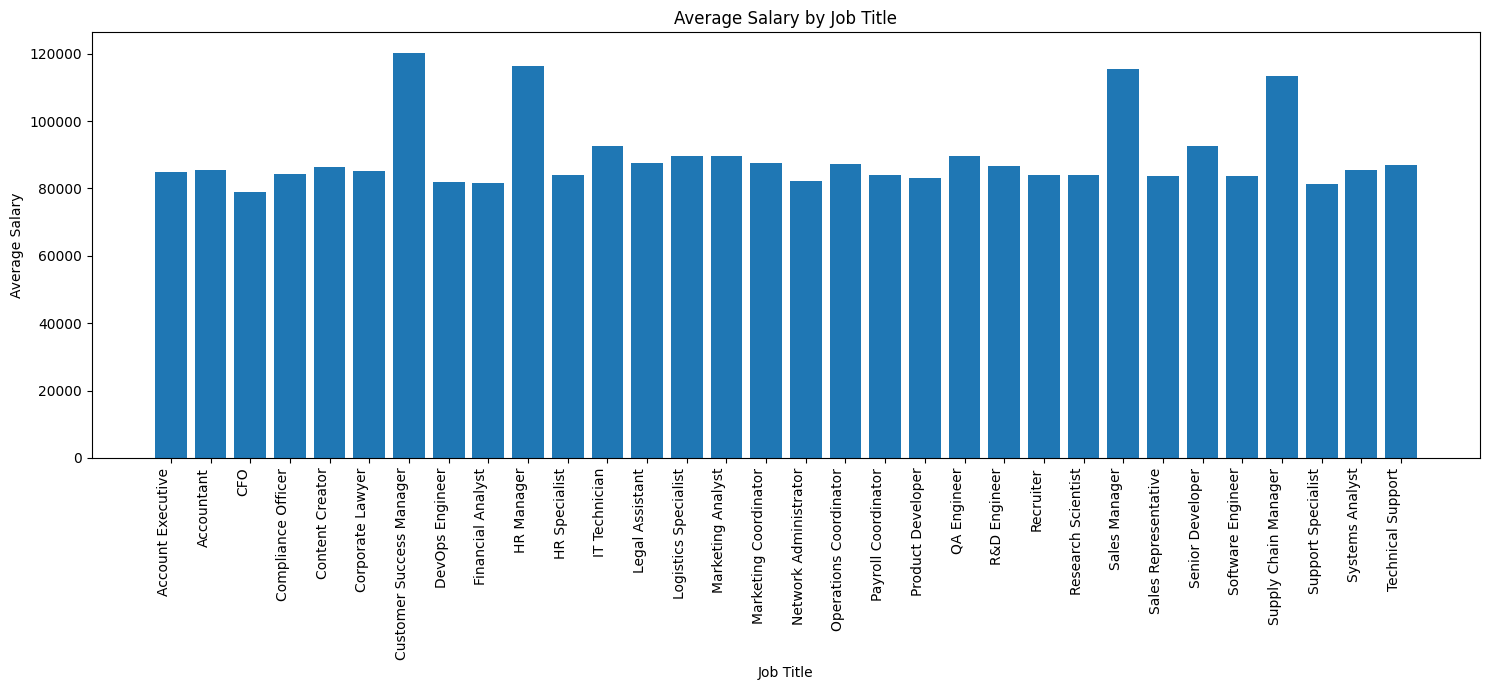

In [20]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')

# SQL query to calculate the average salary for each job title
query = """
SELECT
    e.job_title,
    AVG(s.salary_amount) AS average_salary
FROM
    Employees e
JOIN
    Salaries s ON e.employee_id = s.employee_id
GROUP BY
    e.job_title;
"""

# Execute the query and load the result into a pandas DataFrame
df_avg_salary_job_title = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the bar plot
plt.figure(figsize=(15, 7))
plt.bar(df_avg_salary_job_title['job_title'], df_avg_salary_job_title['average_salary'])
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Title')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

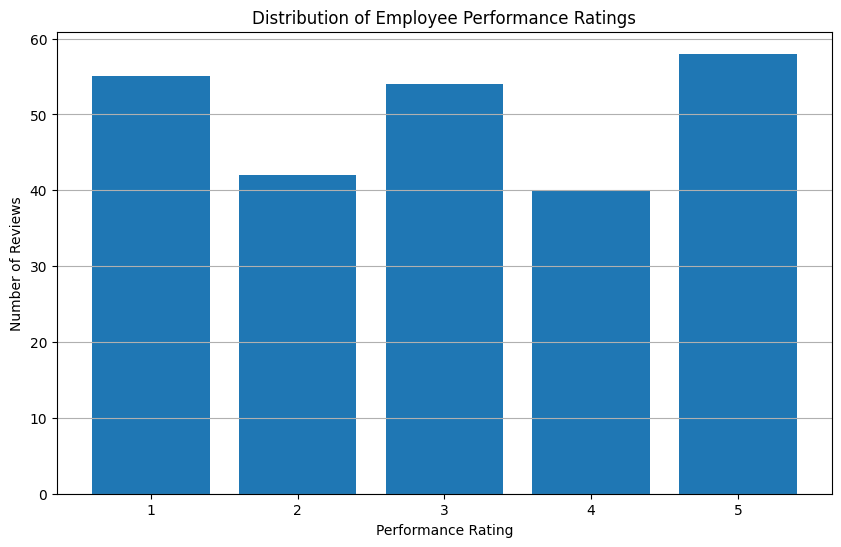

In [21]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')

# SQL query to get the distribution of performance ratings
query = """
SELECT
    rating,
    COUNT(review_id) AS num_reviews
FROM
    Performance_Reviews
GROUP BY
    rating
ORDER BY
    rating;
"""

# Execute the query and load the result into a pandas DataFrame
df_performance_ratings = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_performance_ratings['rating'], df_performance_ratings['num_reviews'])
plt.xlabel('Performance Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Employee Performance Ratings')
plt.xticks(df_performance_ratings['rating'])
plt.grid(axis='y')
plt.show()

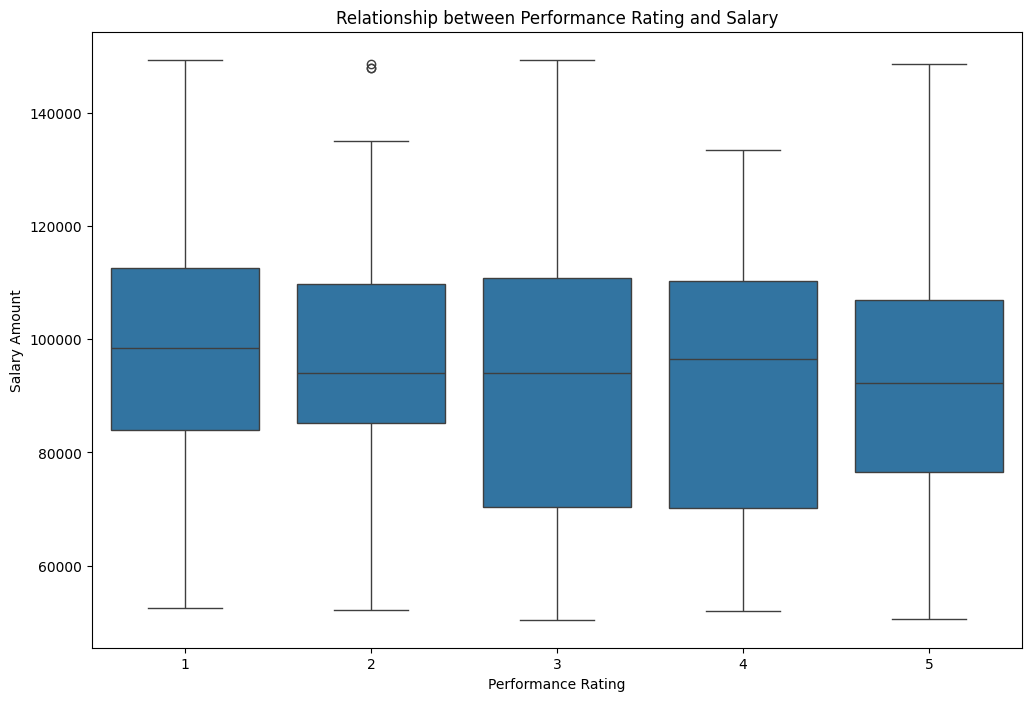

In [22]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')

# SQL query to get performance ratings and salaries
query = """
SELECT
    pr.rating,
    s.salary_amount
FROM
    Performance_Reviews pr
JOIN
    Salaries s ON pr.employee_id = s.employee_id;
"""

# Execute the query and load the result into a pandas DataFrame
df_rating_salary = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='salary_amount', data=df_rating_salary)
plt.xlabel('Performance Rating')
plt.ylabel('Salary Amount')
plt.title('Relationship between Performance Rating and Salary')
plt.show()

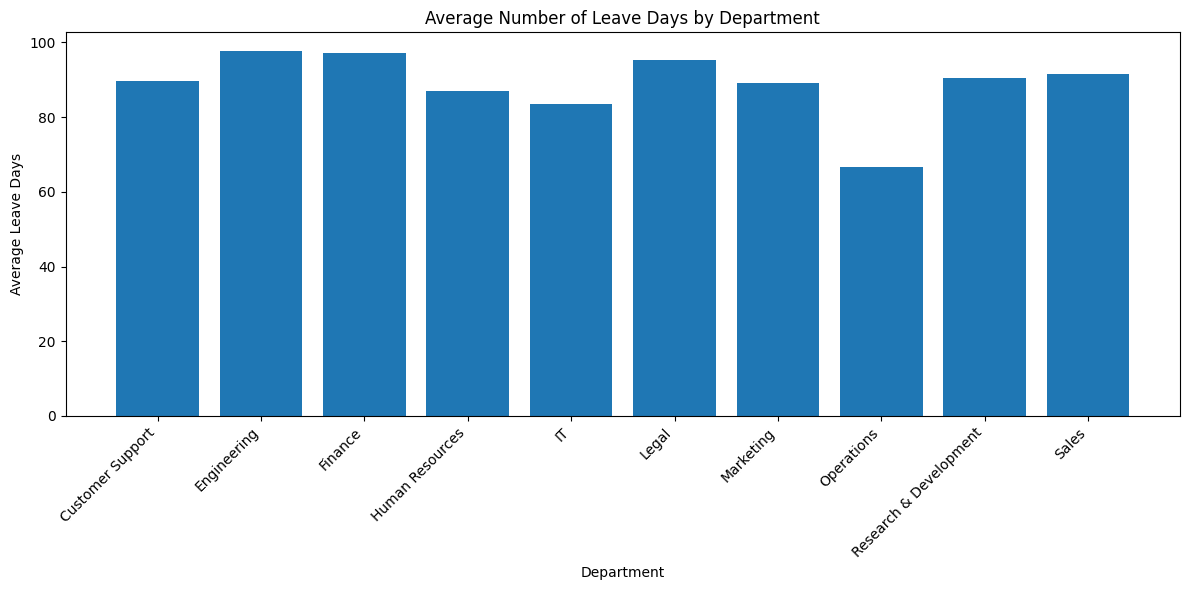

In [23]:

# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')

# SQL query to calculate the average number of leave days per department
query = """
SELECT
    d.department_name,
    AVG(CASE WHEN a.status = 'Leave' THEN 1 ELSE 0 END) * 365 AS average_leave_days
FROM
    Employees e
JOIN
    Departments d ON e.department_id = d.department_id
JOIN
    Attendance a ON e.employee_id = a.employee_id
GROUP BY
    d.department_name;
"""

# Execute the query and load the result into a pandas DataFrame
df_leave_days = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(df_leave_days['department_name'], df_leave_days['average_leave_days'])
plt.xlabel('Department')
plt.ylabel('Average Leave Days')
plt.title('Average Number of Leave Days by Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

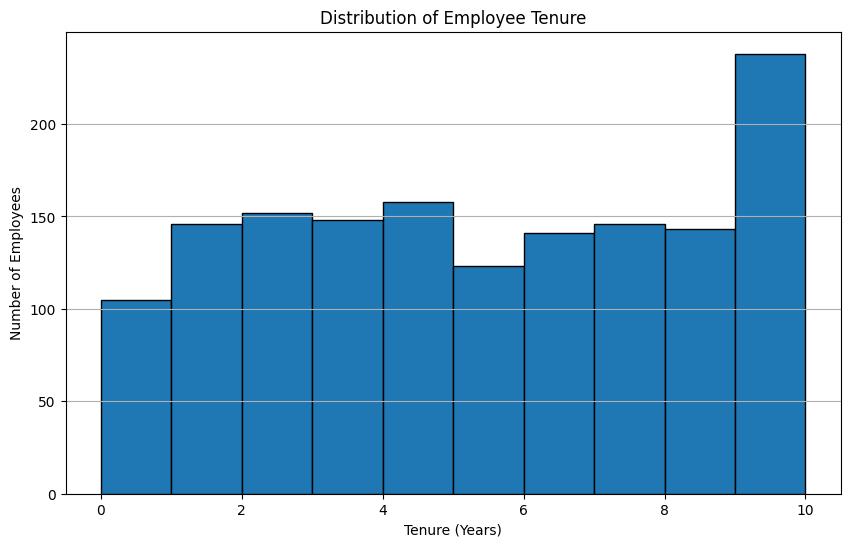

In [24]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')

# SQL query to calculate employee tenure
query = """
SELECT
    CAST(STRFTIME('%Y', 'now') - STRFTIME('%Y', hire_date) AS INTEGER) AS tenure
FROM
    Employees;
"""

# Execute the query and load the result into a pandas DataFrame
df_tenure = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_tenure['tenure'], bins=10, edgecolor='black')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employee Tenure')
plt.grid(axis='y')
plt.show()

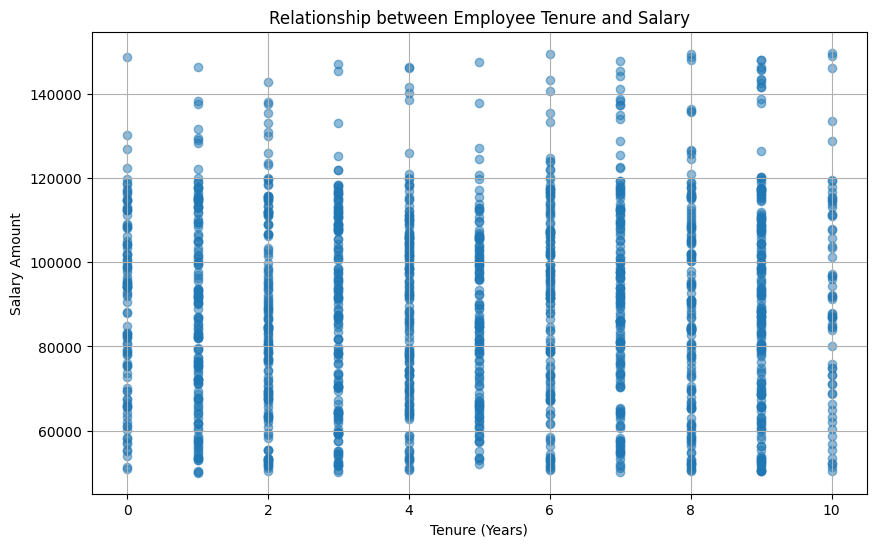

In [25]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')

# SQL query to calculate tenure and get salary
query = """
SELECT
    CAST(STRFTIME('%Y', 'now') - STRFTIME('%Y', e.hire_date) AS INTEGER) AS tenure,
    s.salary_amount
FROM
    Employees e
JOIN
    Salaries s ON e.employee_id = s.employee_id;
"""

# Execute the query and load the result into a pandas DataFrame
df_tenure_salary = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_tenure_salary['tenure'], df_tenure_salary['salary_amount'], alpha=0.5)
plt.xlabel('Tenure (Years)')
plt.ylabel('Salary Amount')
plt.title('Relationship between Employee Tenure and Salary')
plt.grid(True)
plt.show()

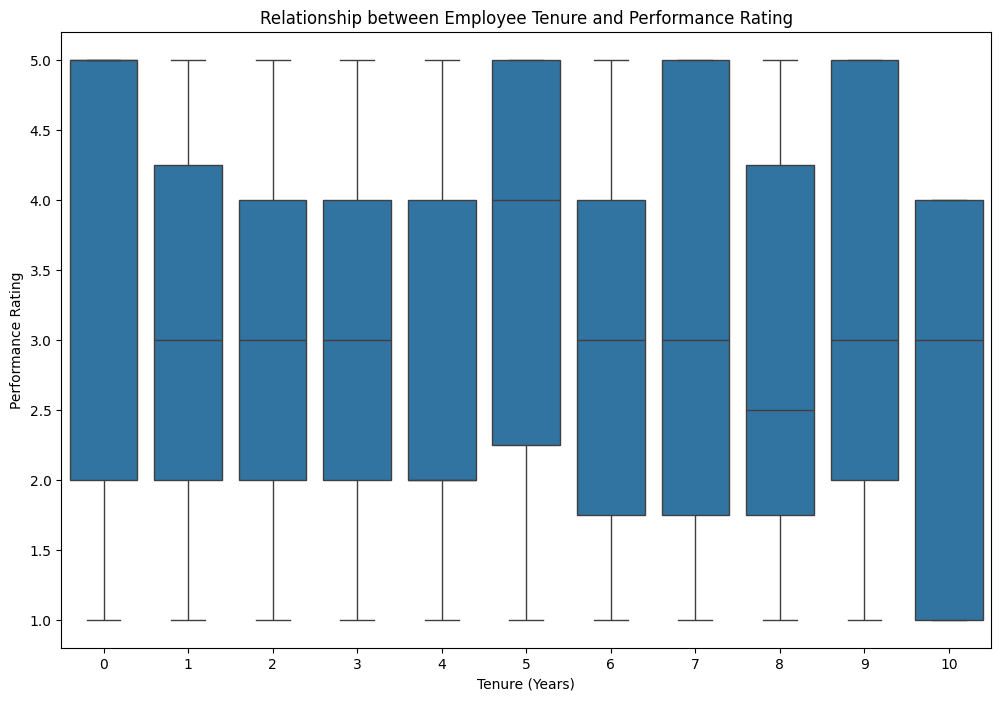

In [26]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')

# SQL query to join Employees and Performance_Reviews and calculate tenure
query = """
SELECT
    CAST(STRFTIME('%Y', 'now') - STRFTIME('%Y', e.hire_date) AS INTEGER) AS tenure,
    pr.rating
FROM
    Employees e
JOIN
    Performance_Reviews pr ON e.employee_id = pr.employee_id;
"""

# Execute the query and load the result into a pandas DataFrame
df_tenure_performance = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='tenure', y='rating', data=df_tenure_performance)
plt.xlabel('Tenure (Years)')
plt.ylabel('Performance Rating')
plt.title('Relationship between Employee Tenure and Performance Rating')
plt.show()

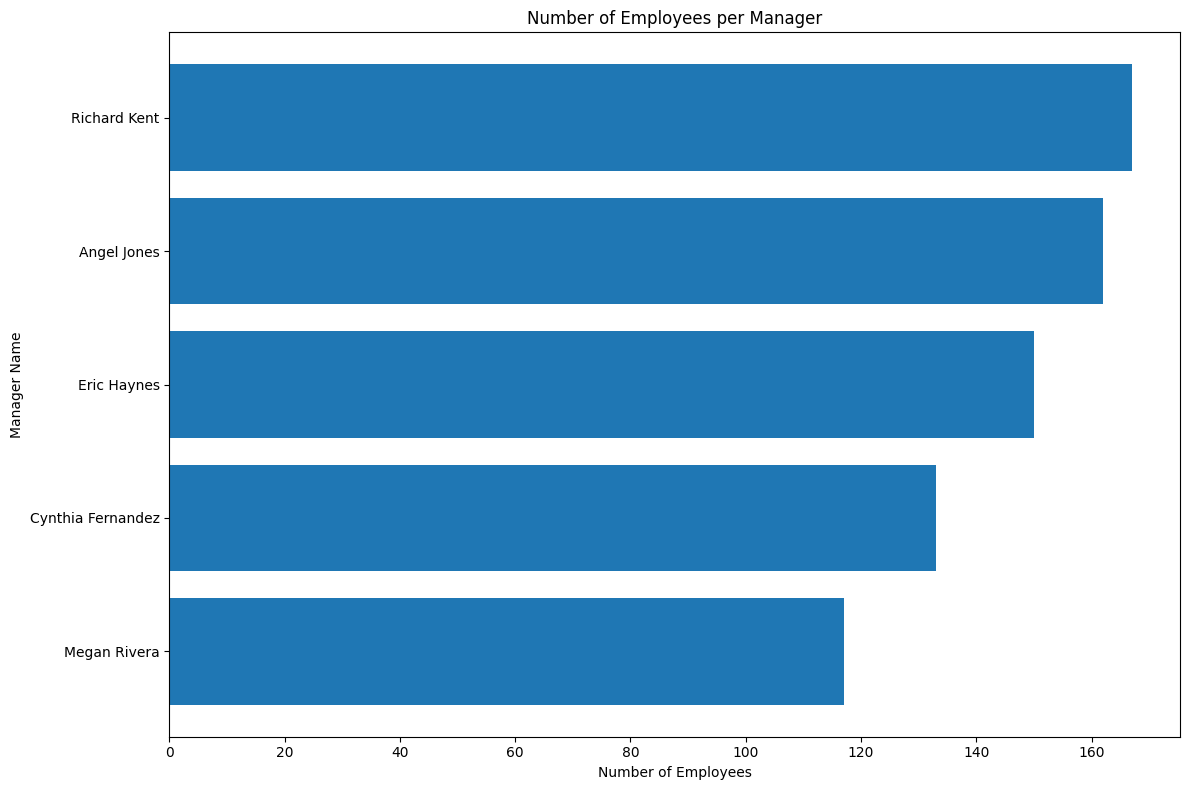

In [27]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')

# SQL query to count the number of employees for each manager
query = """
SELECT
    m.first_name || ' ' || m.last_name AS manager_name,
    COUNT(e.employee_id) AS num_employees
FROM
    Employees e
JOIN
    Employees m ON e.manager_id = m.employee_id
GROUP BY
    manager_name
ORDER BY
    num_employees DESC;
"""

# Execute the query and load the result into a pandas DataFrame
df_manager_team_size = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
plt.barh(df_manager_team_size['manager_name'], df_manager_team_size['num_employees'])
plt.xlabel('Number of Employees')
plt.ylabel('Manager Name')
plt.title('Number of Employees per Manager')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

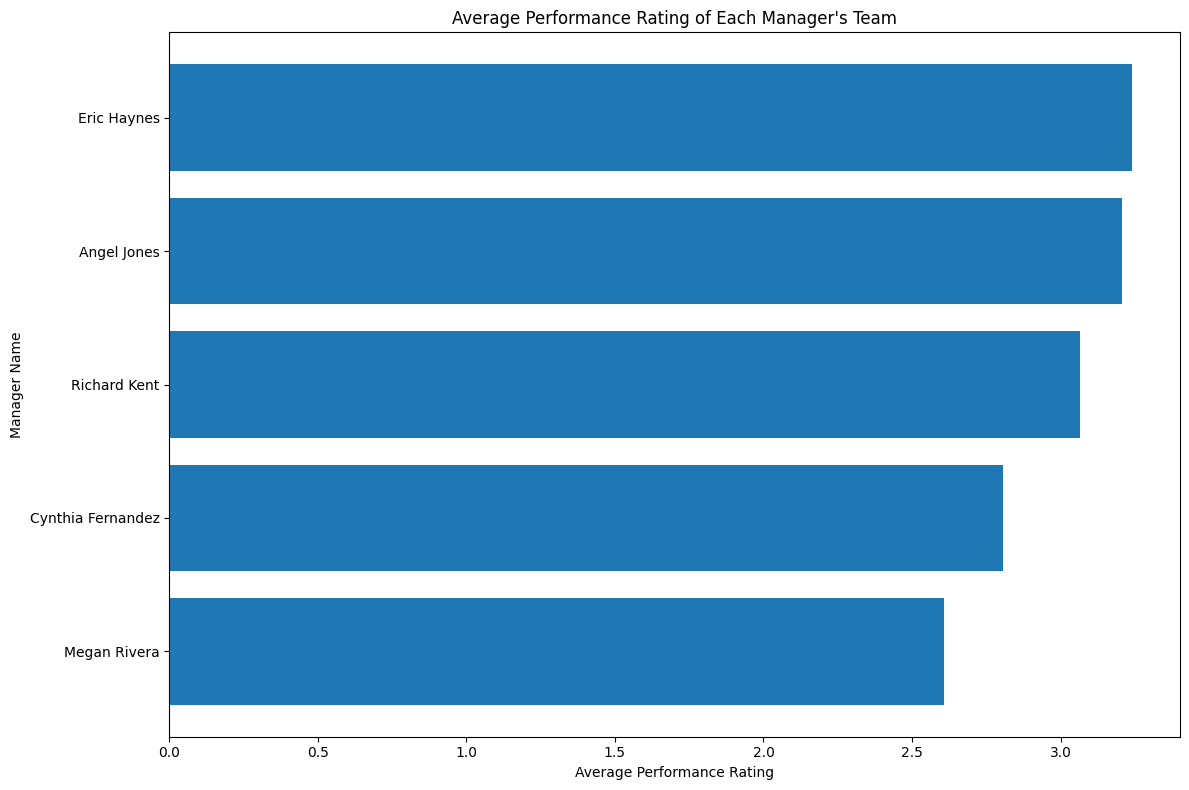

In [28]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/Project data/hr_analysis.db')

# SQL query to calculate the average performance rating for each manager's team
query = """
SELECT
    m.first_name || ' ' || m.last_name AS manager_name,
    AVG(pr.rating) AS average_rating
FROM
    Employees e
JOIN
    Performance_Reviews pr ON e.employee_id = pr.employee_id
JOIN
    Employees m ON e.manager_id = m.employee_id
GROUP BY
    manager_name
ORDER BY
    average_rating DESC;
"""

# Execute the query and load the result into a pandas DataFrame
df_manager_performance = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
plt.barh(df_manager_performance['manager_name'], df_manager_performance['average_rating'])
plt.xlabel('Average Performance Rating')
plt.ylabel('Manager Name')
plt.title('Average Performance Rating of Each Manager\'s Team')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()